In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load and Display dataset

In [3]:

file_path = '/content/drive/MyDrive/ML Project/amazon_reviews.csv'

df = pd.read_csv(file_path)

print(df.head())

  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     27327400  R2YY3LP78L2R1S  B007IXWL2C       600633062   
1          US     33507569  R1Q9MVPBO2GSPC  B00O3UBB1U       384373789   
2          US     21789947  R3C5CKEVYX2O6Y  0812550706       401439625   
3          US     40732382  R26G15D5WHA8LU  B0081L37Z0       281043357   
4          US     39013248  R3441KP6DKF3RO  B007ZGO7EM       274946566   

                               product_title        product_category  \
0  Fifty Shades Freed (Fifty Shades, Book 3)  Digital_Ebook_Purchase   
1                               Rock or Bust                   Music   
2           Ender's Game (The Ender Quintet)                   Books   
3                             21 Jump Street  Digital_Video_Download   
4                       Calculator Plus Free             Mobile_Apps   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0          5.0            0.0          0.0    N      

In [4]:
df.shape

(200000, 15)

In [5]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [6]:
important_cols=['product_title','product_category','star_rating','helpful_votes','total_votes','review_headline','review_body']

### Keep the important columns required for analysis and drop the rest

In [7]:

null_rows = df[important_cols].isnull().any(axis=1)

num_null_rows = null_rows.sum()

print(f"Number of rows with null values in important columns: {num_null_rows}")


Number of rows with null values in important columns: 22


In [8]:
df[null_rows]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
5618,US,36556089,R36A7WYCV69B0A,B0030HOHU4,584471375,Bram Stoker's Dracula,Digital_Video_Download,3.0,0.0,0.0,N,N,Three Stars,NaN,2014-11-20
31523,US,11257997,R28D9DYSIG4UO8,B00DA6YEKS,535832345,"Words of Radiance (The Stormlight Archive, Boo...",Digital_Ebook_Purchase,5.0,1.0,1.0,N,N,NaN,Absolutely stunning! The combination of just t...,2014-04-04
32554,US,10618426,R3UCC0WD39UO0U,B0050DIWFC,762590339,Defending Jacob: A Novel,Digital_Ebook_Purchase,4.0,0.0,0.0,N,N,NaN,interesting and unique plot grappling with cha...,2014-10-26
46263,US,17675949,RLEOK9X2E8TT8,B0070NSPCU,281387686,Raven’s Shadow Book One: Blood Song (Raven's S...,Digital_Ebook_Purchase,5.0,0.0,0.0,N,Y,NaN,About as interesting and complex a main charac...,2012-11-06
52753,US,41137264,RP96HMQEYJ2DI,B007L3BMGA,600633062,Fifty Shades of Grey: Book One of the Fifty Sh...,Digital_Ebook_Purchase,1.0,9.0,11.0,N,N,NaN,This is just apalling...I cant for the life of...,2012-07-12
53223,US,20590330,R11ZY6K54LVGJ8,B004J4WLB4,150581703,The Language of Flowers: A Novel,Digital_Ebook_Purchase,5.0,0.0,0.0,N,N,NaN,I absolutely recommend this magical novel. It ...,2013-09-03
54478,US,46671036,R16QYRJ1ZVA1YR,B00280LYIM,961704050,"Battle of the Labyrinth, The (Percy Jackson an...",Digital_Ebook_Purchase,5.0,0.0,0.0,N,N,NaN,The book really captures your attention cover ...,2012-04-01
57117,US,37223804,R3PIC7BJRF7DKK,B00FAPF5U0,46324555,Candy Crush Saga,Mobile_Apps,4.0,0.0,0.0,N,Y,NaN,I am addicted to Candy Crush. I think about p...,2013-11-08
66516,US,24243370,R1BE81VPN90P2I,B000XUBFE2,47504452,The Book Thief,Digital_Ebook_Purchase,5.0,1.0,1.0,N,N,NaN,This book will change your LIFE! Liesel just m...,2012-06-11
88752,US,43365142,R3DPN2B60SA5KZ,B007J4T2G8,600633062,"Fifty Shades of Grey (Fifty Shades, Book 1)",Digital_Ebook_Purchase,1.0,3.0,6.0,N,N,NaN,really? this is the lamest most juvenile chi...,2012-06-22


### Drop columns with null values

In [9]:
# Drop the rows where any of the important columns have null values
df_cleaned = df.dropna(subset=important_cols)

# Check the shape of the DataFrame after dropping
print(f"Number of rows after dropping nulls: {df_cleaned.shape[0]}")


Number of rows after dropping nulls: 199978


In [10]:
df_cleaned=df_cleaned[important_cols]
df_cleaned.head()

,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body
0,"Fifty Shades Freed (Fifty Shades, Book 3)",Digital_Ebook_Purchase,5.0,0.0,0.0,Five Stars,Love it
1,Rock or Bust,Music,5.0,1.0,2.0,rocking and rolling,How is it possible that 1/2 of the band is gon...
2,Ender's Game (The Ender Quintet),Books,5.0,0.0,0.0,Great Book,The best book I have read in a long time! It i...
3,21 Jump Street,Digital_Video_Download,1.0,1.0,7.0,21 Jump Street,If I could give this movie zero stars I would....
4,Calculator Plus Free,Mobile_Apps,5.0,0.0,0.0,so easy to use!,easy to use! I like the simplicity of this app...


### Using 50000 rows of data so that training is faster

In [ ]:
df_cleaned=df_cleaned.head(50000)

# Prediction of Star Rating category from review body

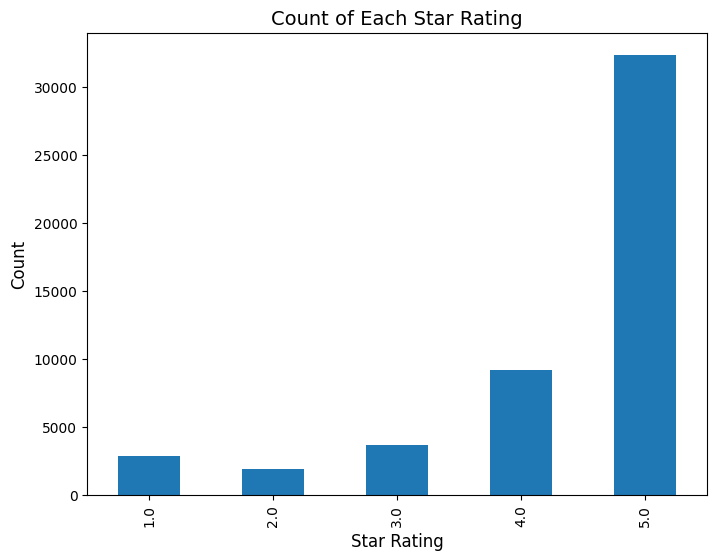

In [ ]:
# Assuming df_cleaned has a 'star_rating' column
plt.figure(figsize=(8, 6))

# Plot a bar chart showing the count of each star rating
df_cleaned['star_rating'].value_counts().sort_index().plot(kind='bar')

# Adding labels and title
plt.title('Count of Each Star Rating', fontsize=14)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

In [ ]:
!pip install transformers torch

## Convert Reviews to BERT Embeddings

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

In [ ]:
# Step 3: Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Ensure the model runs on GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
def get_bert_embeddings_batch(reviews, batch_size=32):
    embeddings_list = []

    total_batches = (len(reviews) + batch_size - 1) // batch_size  # Calculate total number of batches

    for i in range(0, len(reviews), batch_size):
        batch = reviews[i:i + batch_size]

        # Tokenize the batch
        tokens = tokenizer(
            batch,
            padding=True,
            truncation=True,
            max_length=512,
            return_tensors="pt"
        )
        tokens = {key: val.to(device) for key, val in tokens.items()}

        # Get model outputs
        with torch.no_grad():
            outputs = model(**tokens)

        # Extract the [CLS] token embeddings
        batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings_list.extend(batch_embeddings)

        # Print every 100th batch
        batch_number = (i // batch_size) + 1
        if batch_number % 50 == 0:
            print(f"Completed batch {batch_number}/{total_batches}")

    return embeddings_list




In [ ]:
# Step 5: Extract BERT embeddings from the cleaned review bodies
reviews = df_cleaned['review_body'].tolist()  # Extract the cleaned review text as a list
bert_embeddings = get_bert_embeddings_batch(reviews)

# Step 6: Convert embeddings into a list of vectors
embeddings_as_vectors = [embedding.tolist() for embedding in bert_embeddings]



Completed batch 50/1563
Completed batch 100/1563
Completed batch 150/1563
Completed batch 200/1563
Completed batch 250/1563
Completed batch 300/1563
Completed batch 350/1563
Completed batch 400/1563
Completed batch 450/1563
Completed batch 500/1563
Completed batch 550/1563
Completed batch 600/1563
Completed batch 650/1563
Completed batch 700/1563
Completed batch 750/1563
Completed batch 800/1563
Completed batch 850/1563
Completed batch 900/1563
Completed batch 950/1563
Completed batch 1000/1563
Completed batch 1050/1563
Completed batch 1100/1563
Completed batch 1150/1563
Completed batch 1200/1563
Completed batch 1250/1563
Completed batch 1300/1563
Completed batch 1350/1563
Completed batch 1400/1563
Completed batch 1450/1563
Completed batch 1500/1563
Completed batch 1550/1563


In [ ]:
# Step 7: Create a DataFrame with two columns: embeddings and star ratings
output_df = pd.DataFrame({
    'bert_embeddings': embeddings_as_vectors,
    'star_rating': df_cleaned['star_rating']
})

# Step 8: Display the DataFrame with two columns
output_df.head()

,bert_embeddings,star_rating
0,"[-0.24936528503894806, 0.19047845900058746, -0...",5.0
1,"[-0.0004418618918862194, 0.21825392544269562, ...",5.0
2,"[-0.0578409805893898, -0.31651830673217773, 0....",5.0
3,"[0.22823745012283325, -0.4920012354850769, 0.2...",1.0
4,"[-0.17033377289772034, -0.13702963292598724, 0...",5.0


In [ ]:
# Save the DataFrame using Pickle
output_df.to_pickle('/content/drive/MyDrive/ML Project/bert_embeddings_star_rating.pkl')

In [ ]:
# To load the Pickle file later:
df1 = pd.read_pickle('/content/drive/MyDrive/ML Project/bert_embeddings_star_rating.pkl')
X=df1['bert_embeddings']
y=df1['star_rating']



## Feed the BERT Embeddings to ML Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
X_2d=np.array(X.tolist())
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)


### Naive Bayes with BERT

In [ ]:
# Step 5: Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 53.56%

Classification Report:
               precision    recall  f1-score   support

         1.0       0.31      0.54      0.39       538
         2.0       0.14      0.43      0.21       394
         3.0       0.21      0.28      0.24       789
         4.0       0.29      0.27      0.28      1831
         5.0       0.82      0.65      0.73      6448

    accuracy                           0.54     10000
   macro avg       0.35      0.43      0.37     10000
weighted avg       0.62      0.54      0.57     10000



### Logistic Regression with BERT

In [ ]:
from sklearn.linear_model import LogisticRegression
# Step 5: Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)  # Use more iterations if needed
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 68.60%

Classification Report:
               precision    recall  f1-score   support

         1.0       0.50      0.54      0.52       538
         2.0       0.30      0.18      0.22       394
         3.0       0.35      0.21      0.26       789
         4.0       0.41      0.21      0.27      1831
         5.0       0.77      0.92      0.84      6448

    accuracy                           0.69     10000
   macro avg       0.46      0.41      0.42     10000
weighted avg       0.63      0.69      0.65     10000



### Random Forest with BERT

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Step 5: Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 65.17%

Classification Report:
               precision    recall  f1-score   support

         1.0       0.52      0.06      0.10       538
         2.0       0.50      0.01      0.02       394
         3.0       0.31      0.03      0.05       789
         4.0       0.32      0.05      0.09      1831
         5.0       0.66      0.99      0.79      6448

    accuracy                           0.65     10000
   macro avg       0.46      0.23      0.21     10000
weighted avg       0.56      0.65      0.54     10000



### XGBoost with BERT

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Convert labels to integer type and shift to start from 0
y_train_adjusted = np.array(y_train, dtype=int) - 1
y_test_adjusted = np.array(y_test, dtype=int) - 1

# Initialize and train the XGBoost model
model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train_adjusted)

# Make predictions on the test set
y_pred_adjusted = model.predict(X_test)

# Adjust predictions back to original labels by adding 1
y_pred = y_pred_adjusted + 1

# Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")

# Print the classification report for more detailed metrics
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:22:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 67.36%

XGBoost Classification Report:
               precision    recall  f1-score   support

         1.0       0.53      0.39      0.45       538
         2.0       0.29      0.09      0.14       394
         3.0       0.37      0.15      0.21       789
         4.0       0.35      0.19      0.25      1831
         5.0       0.74      0.93      0.82      6448

    accuracy                           0.67     10000
   macro avg       0.46      0.35      0.37     10000
weighted avg       0.61      0.67      0.62     10000



## Feed the BERT Embeddings to DL Models

### RNN with BERT

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Ensure the tensors are in the correct format
X_tensor = torch.tensor(X, dtype=torch.float32)  # Ensure BERT embeddings are float32 tensors
y_tensor = torch.tensor(y, dtype=torch.long)     # Ensure labels are long tensors
y_tensor=y_tensor-1

# Add sequence length dimension to X (since BERT embeddings are static vectors)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, embedding_size)
print(len(torch.unique(y_tensor)))

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



5


In [ ]:
# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)

        # Forward propagate the RNN
        out, _ = self.rnn(x, h0)

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out

In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Size of BERT embeddings (e.g., 768)
hidden_size = 128               # Number of RNN units
output_size = len(torch.unique(y_tensor))  # Number of unique star ratings (classes)
num_layers = 1                  # Number of RNN layers

# Initialize the model
model = RNNModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model and data to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)


In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.8262
Epoch [2/10], Loss: 0.7839
Epoch [3/10], Loss: 0.7678
Epoch [4/10], Loss: 0.7594
Epoch [5/10], Loss: 0.7480
Epoch [6/10], Loss: 0.7373
Epoch [7/10], Loss: 0.7268
Epoch [8/10], Loss: 0.7135
Epoch [9/10], Loss: 0.7015
Epoch [10/10], Loss: 0.6901


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)

Accuracy: 70.18%
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.63      0.56       556
           1       0.31      0.20      0.24       378
           2       0.41      0.17      0.24       731
           3       0.45      0.18      0.26      1834
           4       0.77      0.94      0.85      6501

    accuracy                           0.70     10000
   macro avg       0.49      0.42      0.43     10000
weighted avg       0.65      0.70      0.65     10000



### LSTM with BERT

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Ensure the tensors are in the correct format
X_tensor = torch.tensor(X, dtype=torch.float32)  # Ensure BERT embeddings are float32 tensors
y_tensor = torch.tensor(y, dtype=torch.long)     # Ensure labels are long tensors
y_tensor = y_tensor - 1  # Assuming labels need to be 0-indexed

# Add sequence length dimension to X (since BERT embeddings are static vectors)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, embedding_size)
print(len(torch.unique(y_tensor)))

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

5


In [ ]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Hidden state
        c0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Cell state

        # Forward propagate the LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out

In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Size of BERT embeddings (e.g., 768)
hidden_size = 128               # Number of LSTM units
output_size = len(torch.unique(y_tensor))  # Number of unique categories
num_layers = 1                  # Number of LSTM layers

# Initialize the model
model = LSTMModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)


In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.8292
Epoch [2/10], Loss: 0.7772
Epoch [3/10], Loss: 0.7601
Epoch [4/10], Loss: 0.7482
Epoch [5/10], Loss: 0.7360
Epoch [6/10], Loss: 0.7220
Epoch [7/10], Loss: 0.7080
Epoch [8/10], Loss: 0.6929
Epoch [9/10], Loss: 0.6748
Epoch [10/10], Loss: 0.6591


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)

Accuracy: 69.84%
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       556
           1       0.30      0.20      0.24       405
           2       0.36      0.28      0.31       755
           3       0.45      0.14      0.21      1799
           4       0.76      0.95      0.85      6485

    accuracy                           0.70     10000
   macro avg       0.48      0.42      0.43     10000
weighted avg       0.65      0.70      0.65     10000



### GRU with BERT

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Ensure the tensors are in the correct format
X_tensor = torch.tensor(X, dtype=torch.float32)  # Ensure BERT embeddings are float32 tensors
y_tensor = torch.tensor(y, dtype=torch.long)     # Ensure labels are long tensors
y_tensor = y_tensor - 1  # Assuming labels need to be 0-indexed

# Add sequence length dimension to X (since BERT embeddings are static vectors)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, embedding_size)
print(len(torch.unique(y_tensor)))

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


5


In [ ]:
# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Hidden state

        # Forward propagate the GRU
        out, _ = self.gru(x, h0)

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out


In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Size of BERT embeddings (e.g., 768)
hidden_size = 128               # Number of GRU units
output_size = len(torch.unique(y_tensor))  # Number of unique categories (product categories)
num_layers = 1                  # Number of GRU layers

# Initialize the model
model = GRUModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.8254
Epoch [2/10], Loss: 0.7779
Epoch [3/10], Loss: 0.7596
Epoch [4/10], Loss: 0.7452
Epoch [5/10], Loss: 0.7330
Epoch [6/10], Loss: 0.7189
Epoch [7/10], Loss: 0.7036
Epoch [8/10], Loss: 0.6873
Epoch [9/10], Loss: 0.6684
Epoch [10/10], Loss: 0.6495


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)

Accuracy: 69.51%
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       590
           1       0.26      0.13      0.17       404
           2       0.34      0.29      0.31       687
           3       0.46      0.17      0.24      1863
           4       0.76      0.94      0.84      6456

    accuracy                           0.70     10000
   macro avg       0.48      0.42      0.43     10000
weighted avg       0.64      0.70      0.65     10000



## Preprocessing pipeline for TF-IDF vectors

### Converting to Lowercase

In [ ]:
df_cleaned['review_body'] = df_cleaned['review_body'].str.lower()
df_cleaned['review_body'].head()

,review_body
0,love it
1,how is it possible that 1/2 of the band is gon...
2,the best book i have read in a long time! it i...
3,if i could give this movie zero stars i would....
4,easy to use! i like the simplicity of this app...


### Tokenization

In [ ]:
import nltk
nltk.download('punkt')

df_cleaned['review_body'] = df_cleaned['review_body'].apply(nltk.word_tokenize)
df_cleaned['review_body'].head()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review_body
0,"[love, it]"
1,"[how, is, it, possible, that, 1/2, of, the, ba..."
2,"[the, best, book, i, have, read, in, a, long, ..."
3,"[if, i, could, give, this, movie, zero, stars,..."
4,"[easy, to, use, !, i, like, the, simplicity, o..."


### Removing stopwords

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
df_cleaned['review_body'] = df_cleaned['review_body'].apply(lambda words: [word for word in words if word not in stop_words])
df_cleaned['review_body'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review_body
0,[love]
1,"[possible, 1/2, band, gone, sounds, totally, l..."
2,"[best, book, read, long, time, !, hard, find, ..."
3,"[could, give, movie, zero, stars, would, ., ne..."
4,"[easy, use, !, like, simplicity, app, ., never..."


### Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
df_cleaned['review_body'] = df_cleaned['review_body'].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])
df_cleaned['review_body'].head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review_body
0,[love]
1,"[possible, 1/2, band, gone, sound, totally, li..."
2,"[best, book, read, long, time, !, hard, find, ..."
3,"[could, give, movie, zero, star, would, ., nev..."
4,"[easy, use, !, like, simplicity, app, ., never..."


### Generating most frequent words for each star rating

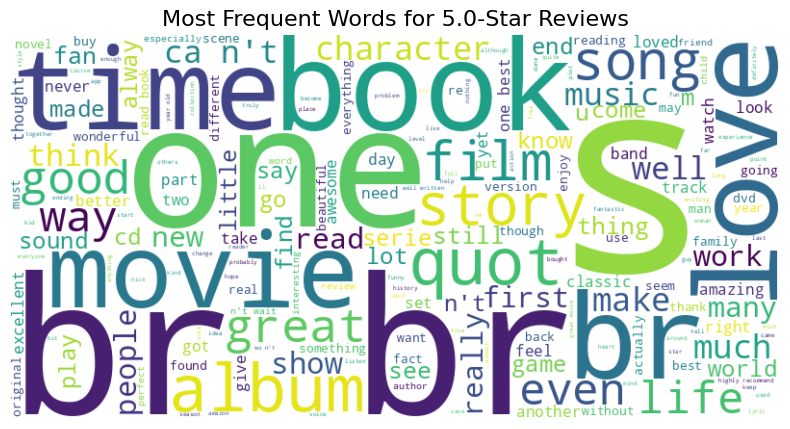

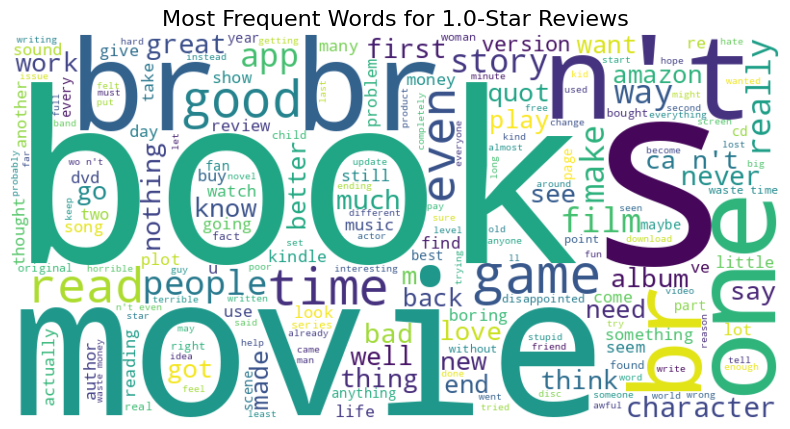

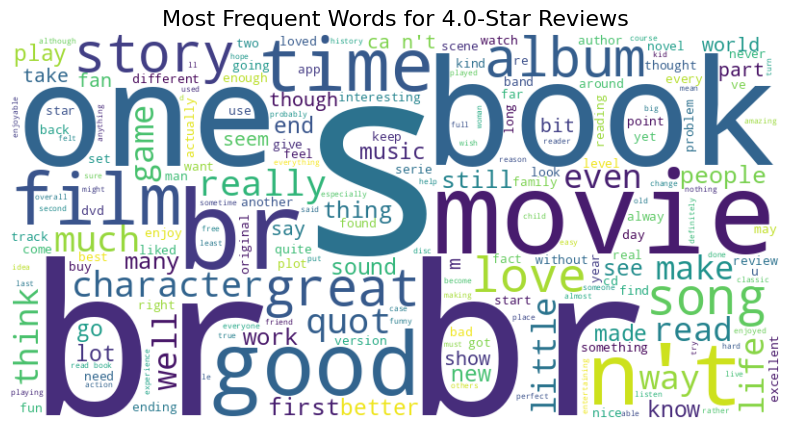

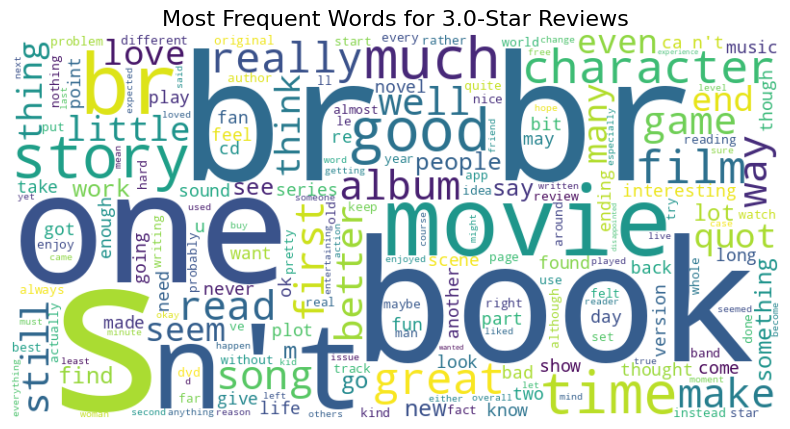

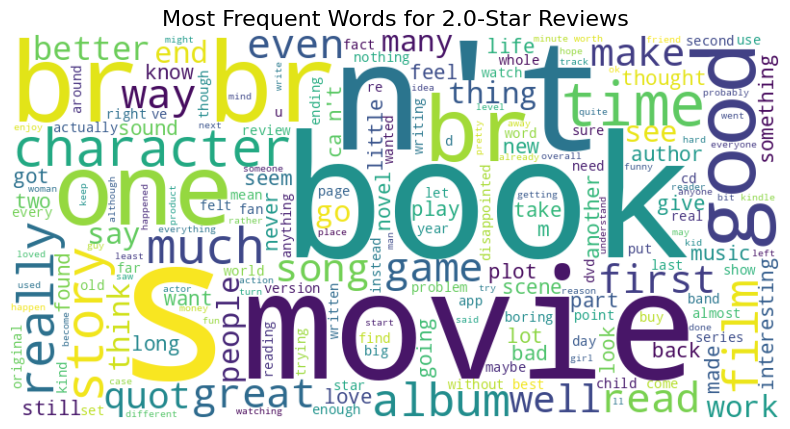

In [ ]:
from wordcloud import WordCloud

# Function to generate a word cloud for a specific star rating
def generate_wordcloud(text, star_rating):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Most Frequent Words for {star_rating}-Star Reviews", fontsize=16)
    plt.show()

# Loop through each unique star rating
for rating in df_cleaned['star_rating'].unique():
    # Filter the reviews for the current star rating
    reviews = df_cleaned[df_cleaned['star_rating'] == rating]

    # Concatenate all lemmatized words into a single string for the word cloud
    review_text = ' '.join([' '.join(lemma) for lemma in reviews['review_body']])

    # Generate and display the word cloud
    generate_wordcloud(review_text, rating)


### TF-IDF vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use the lemmatized reviews (or any other preprocessed text like lowercased reviews)
# Concatenate the lemmatized words back into full sentences for each review
df_cleaned['review_tf_idf'] = df_cleaned['review_body'].apply(lambda x: ' '.join(x))

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust 'max_features' based on your needs

# Fit the vectorizer on the processed review text and transform to get the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df_cleaned['review_tf_idf'])

# Convert the result to a DataFrame for easier inspection (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
tfidf_df.head()


,00,000,06,07,10,100,1000,11,12,13,...,youtube,yr,zen,zep,zeppelin,zero,zimmer,zombie,zone,zoom
0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.31592,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.495923,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.266704,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.135688,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the target variable (for example, 'star_rating')
y = df_cleaned['star_rating']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 5000), (10000, 5000), (40000,), (10000,))

## Feeding the TF-IDF vectors to ML Models

### Logistic Regression with TF-IDF

In [ ]:
from sklearn.linear_model import LogisticRegression
# Step 5: Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)  # Use more iterations if needed
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 68.38%

Classification Report:
               precision    recall  f1-score   support

         1.0       0.59      0.41      0.48       538
         2.0       0.39      0.07      0.12       394
         3.0       0.39      0.13      0.20       789
         4.0       0.42      0.20      0.27      1831
         5.0       0.73      0.95      0.82      6448

    accuracy                           0.68     10000
   macro avg       0.50      0.35      0.38     10000
weighted avg       0.62      0.68      0.63     10000



### Naive Bayes with TF-IDF

In [ ]:

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, nb_preds)}")
# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.6521

Classification Report:
               precision    recall  f1-score   support

         1.0       0.50      0.46      0.48       538
         2.0       0.25      0.15      0.19       394
         3.0       0.31      0.18      0.23       789
         4.0       0.38      0.25      0.30      1831
         5.0       0.76      0.89      0.82      6448

    accuracy                           0.67     10000
   macro avg       0.44      0.39      0.40     10000
weighted avg       0.62      0.67      0.64     10000



### Random Forest with TF-IDF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Step 5: Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=150, random_state=42)  # Using 150 trees
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 66.08%

Classification Report:
               precision    recall  f1-score   support

         1.0       0.59      0.19      0.29       538
         2.0       0.00      0.00      0.00       394
         3.0       0.44      0.05      0.08       789
         4.0       0.47      0.06      0.10      1831
         5.0       0.67      0.99      0.80      6448

    accuracy                           0.66     10000
   macro avg       0.43      0.26      0.25     10000
weighted avg       0.58      0.66      0.55     10000



### XGBoost with TF-IDF

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Convert labels to integer type and shift to start from 0
y_train_adjusted = np.array(y_train, dtype=int) - 1
y_test_adjusted = np.array(y_test, dtype=int) - 1

# Initialize and train the XGBoost model
model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train_adjusted)

# Make predictions on the test set
y_pred_adjusted = model.predict(X_test)

# Adjust predictions back to original labels by adding 1
y_pred = y_pred_adjusted + 1

# Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")

# Print the classification report for more detailed metrics
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred))



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:48:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 67.48%

XGBoost Classification Report:
               precision    recall  f1-score   support

         1.0       0.60      0.30      0.40       538
         2.0       0.22      0.03      0.05       394
         3.0       0.43      0.10      0.16       789
         4.0       0.41      0.15      0.21      1831
         5.0       0.70      0.97      0.81      6448

    accuracy                           0.67     10000
   macro avg       0.47      0.31      0.33     10000
weighted avg       0.60      0.67      0.60     10000



## Feeding the TF-IDF vectors to DL Models

In [ ]:
X=tfidf_matrix
y=df_cleaned['star_rating']

### RNN with TF-IDF

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Convert TF-IDF matrix and target to tensors
X_tensor = torch.tensor(X.toarray(), dtype=torch.float32)  # Convert TF-IDF matrix to tensor (convert sparse to dense)
y_tensor = torch.tensor(y.values, dtype=torch.long)        # Star ratings as long tensors
y_tensor = y_tensor - 1  # Assuming star ratings need to be 0-indexed

# Add sequence length dimension to X (since TF-IDF is treated as a static feature vector)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, num_features)

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)

        # Forward propagate the RNN
        out, _ = self.rnn(x, h0)

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out

In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Number of features in the TF-IDF matrix
hidden_size = 128               # Number of RNN units
output_size = len(torch.unique(y_tensor))  # Number of unique star ratings (classes)
num_layers = 1                  # Number of RNN layers

# Initialize the model
model = RNNModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.8926
Epoch [2/10], Loss: 0.7456
Epoch [3/10], Loss: 0.6928
Epoch [4/10], Loss: 0.6575
Epoch [5/10], Loss: 0.6342
Epoch [6/10], Loss: 0.6178
Epoch [7/10], Loss: 0.6055
Epoch [8/10], Loss: 0.5958
Epoch [9/10], Loss: 0.5871
Epoch [10/10], Loss: 0.5801


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)

Accuracy: 65.83%
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.43      0.44       596
           1       0.19      0.19      0.19       378
           2       0.26      0.18      0.21       697
           3       0.36      0.23      0.28      1782
           4       0.77      0.87      0.82      6547

    accuracy                           0.66     10000
   macro avg       0.41      0.38      0.39     10000
weighted avg       0.62      0.66      0.63     10000



### LSTM with TF-IDF

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Convert TF-IDF matrix and target to tensors
X_tensor = torch.tensor(X.toarray(), dtype=torch.float32)  # Convert TF-IDF matrix to tensor (convert sparse to dense)
y_tensor = torch.tensor(y.values, dtype=torch.long)        # Star ratings as long tensors
y_tensor = y_tensor - 1  # Assuming star ratings need to be 0-indexed

# Add sequence length dimension to X (since TF-IDF is treated as a static feature vector)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, num_features)

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Hidden state
        c0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Cell state

        # Forward propagate the LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out


In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Number of features in the TF-IDF matrix
hidden_size = 128               # Number of LSTM units
output_size = len(torch.unique(y_tensor))  # Number of unique star ratings (classes)
num_layers = 1                  # Number of LSTM layers

# Initialize the model
model = LSTMModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)


In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.9195
Epoch [2/10], Loss: 0.7500
Epoch [3/10], Loss: 0.6969
Epoch [4/10], Loss: 0.6560
Epoch [5/10], Loss: 0.6223
Epoch [6/10], Loss: 0.5952
Epoch [7/10], Loss: 0.5713
Epoch [8/10], Loss: 0.5477
Epoch [9/10], Loss: 0.5235
Epoch [10/10], Loss: 0.4985


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)

Accuracy: 65.76%
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.41      0.45       604
           1       0.20      0.21      0.20       394
           2       0.28      0.24      0.26       759
           3       0.38      0.22      0.28      1825
           4       0.77      0.88      0.82      6418

    accuracy                           0.66     10000
   macro avg       0.42      0.39      0.40     10000
weighted avg       0.62      0.66      0.63     10000



### GRU with TF-IDF

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Convert TF-IDF matrix and target to tensors
X_tensor = torch.tensor(X.toarray(), dtype=torch.float32)  # Convert TF-IDF matrix to tensor (convert sparse to dense)
y_tensor = torch.tensor(y.values, dtype=torch.long)        # Star ratings as long tensors
y_tensor = y_tensor - 1  # Assuming star ratings need to be 0-indexed

# Add sequence length dimension to X (since TF-IDF is treated as a static feature vector)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, num_features)

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Hidden state

        # Forward propagate the GRU
        out, _ = self.gru(x, h0)

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out


In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Number of features in the TF-IDF matrix
hidden_size = 128               # Number of GRU units
output_size = len(torch.unique(y_tensor))  # Number of unique star ratings (classes)
num_layers = 1                  # Number of GRU layers

# Initialize the model
model = GRUModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.9016
Epoch [2/10], Loss: 0.7435
Epoch [3/10], Loss: 0.6907
Epoch [4/10], Loss: 0.6531
Epoch [5/10], Loss: 0.6237
Epoch [6/10], Loss: 0.6009
Epoch [7/10], Loss: 0.5802
Epoch [8/10], Loss: 0.5604
Epoch [9/10], Loss: 0.5410
Epoch [10/10], Loss: 0.5211


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)

Accuracy: 65.26%
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.42      0.43       571
           1       0.21      0.19      0.20       375
           2       0.24      0.21      0.22       735
           3       0.37      0.26      0.31      1836
           4       0.78      0.86      0.82      6483

    accuracy                           0.65     10000
   macro avg       0.41      0.39      0.40     10000
weighted avg       0.62      0.65      0.63     10000



# Prediction of product category from review body

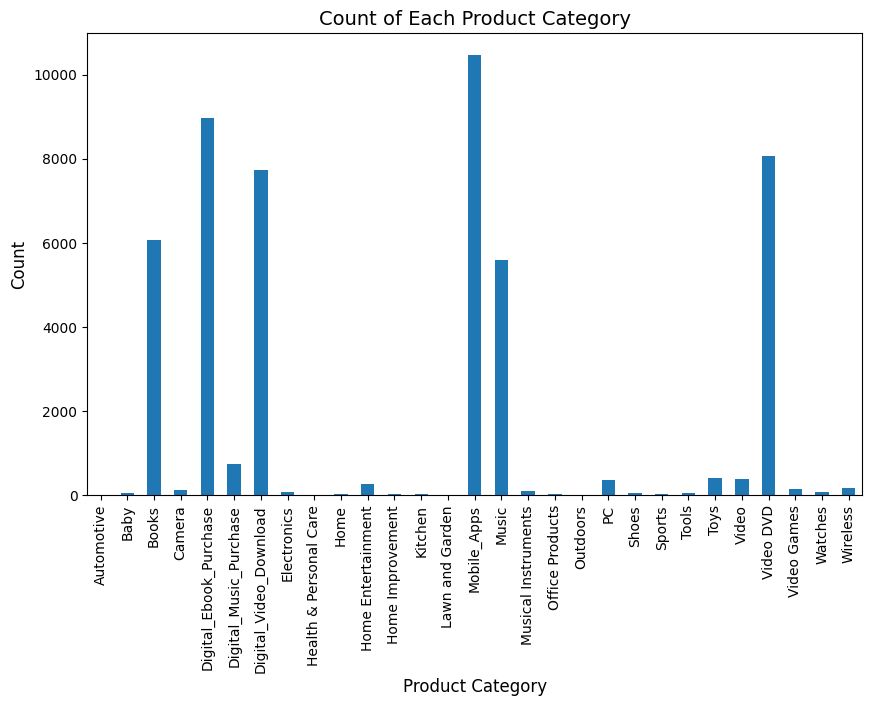

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_cleaned has a 'product_category' column
plt.figure(figsize=(10, 6))

# Plot a bar chart showing the count of each product category
df_cleaned['product_category'].value_counts().sort_index().plot(kind='bar')

# Adding labels and title
plt.title('Count of Each Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()


In [ ]:
# Display the count of each product category
product_category_counts = df_cleaned['product_category'].value_counts()
print(product_category_counts)


product_category
Mobile_Apps               10463
Digital_Ebook_Purchase     8967
Video DVD                  8054
Digital_Video_Download     7739
Books                      6068
Music                      5588
Digital_Music_Purchase      741
Toys                        408
Video                       373
PC                          370
Home Entertainment          261
Wireless                    168
Video Games                 142
Camera                      124
Musical Instruments          86
Watches                      84
Electronics                  71
Shoes                        57
Tools                        54
Baby                         43
Sports                       28
Home Improvement             27
Kitchen                      22
Home                         20
Office Products              15
Outdoors                     11
Lawn and Garden               9
Health & Personal Care        6
Automotive                    1
Name: count, dtype: int64


## BERT Embeddings

In [ ]:
output_df2 = pd.DataFrame({
    'bert_embeddings': embeddings_as_vectors,
    'product_category': df_cleaned['product_category']
})
output_df2.head()

,bert_embeddings,product_category
0,"[-0.24936528503894806, 0.19047845900058746, -0...",Digital_Ebook_Purchase
1,"[-0.0004418618918862194, 0.21825392544269562, ...",Music
2,"[-0.0578409805893898, -0.31651830673217773, 0....",Books
3,"[0.22823745012283325, -0.4920012354850769, 0.2...",Digital_Video_Download
4,"[-0.17033377289772034, -0.13702963292598724, 0...",Mobile_Apps


In [ ]:
# Save the DataFrame using Pickle
output_df2.to_pickle('/content/drive/MyDrive/ML Project/bert_embeddings_product_category.pkl')

In [ ]:
# To load the Pickle file later:
df2 = pd.read_pickle('/content/drive/MyDrive/ML Project/bert_embeddings_product_category.pkl')
X=df2['bert_embeddings']
y=df2['product_category']
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
X_2d=np.array(X.tolist())
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

## Feed BERT Embeddings to DL Models

### RNN with BERT

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
# Encode product_category labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode string labels into integers
y_tensor = torch.tensor(y_encoded, dtype=torch.long)  # Convert labels to long tensor

# Convert BERT embeddings to a PyTorch tensor
X_tensor = torch.tensor(X_2d, dtype=torch.float32)  # Ensure embeddings are float32 tensors

# Add sequence length dimension to X (since BERT embeddings are treated as static vectors)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, embedding_size)

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)

        # Forward propagate the RNN
        out, _ = self.rnn(x, h0)

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out

In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Size of BERT embeddings (e.g., 768 dimensions)
hidden_size = 128               # Number of RNN units
output_size = len(label_encoder.classes_)  # Number of unique product categories (classes)
num_layers = 1                  # Number of RNN layers

# Initialize the model
model = RNNModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.9706
Epoch [2/10], Loss: 0.8195
Epoch [3/10], Loss: 0.7796
Epoch [4/10], Loss: 0.7537
Epoch [5/10], Loss: 0.7321
Epoch [6/10], Loss: 0.7114
Epoch [7/10], Loss: 0.6926
Epoch [8/10], Loss: 0.6717
Epoch [9/10], Loss: 0.6553
Epoch [10/10], Loss: 0.6375


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)



Accuracy: 70.62%
Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.12      0.18         8
           2       0.60      0.61      0.61      1209
           3       0.83      0.45      0.59        33
           4       0.73      0.68      0.70      1816
           5       0.64      0.06      0.10       161
           6       0.61      0.66      0.64      1497
           7       0.67      0.11      0.19        18
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         4
          10       0.78      0.37      0.50        49
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         2
          14       0.85      0.92      0.88      2072
          15       0.74      0.91      0.82      1114
          16       0.13      0.25      0.17         8
          17       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### LSTM with BERT

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
# Encode product_category labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode string labels into integers
y_tensor = torch.tensor(y_encoded, dtype=torch.long)  # Convert labels to long tensor

# Convert BERT embeddings to a PyTorch tensor
X_tensor = torch.tensor(X_2d, dtype=torch.float32)  # Ensure embeddings are float32 tensors

# Add sequence length dimension to X (since BERT embeddings are treated as static vectors)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, embedding_size)

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Hidden state
        c0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Cell state

        # Forward propagate the LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out

In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Number of features in the TF-IDF matrix
hidden_size = 128               # Number of LSTM units
output_size = len(label_encoder.classes_)  # Number of unique product categories (classes)
num_layers = 1                  # Number of LSTM layers

# Initialize the model
model = LSTMModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.9848
Epoch [2/10], Loss: 0.8165
Epoch [3/10], Loss: 0.7793
Epoch [4/10], Loss: 0.7505
Epoch [5/10], Loss: 0.7238
Epoch [6/10], Loss: 0.7025
Epoch [7/10], Loss: 0.6818
Epoch [8/10], Loss: 0.6574
Epoch [9/10], Loss: 0.6395
Epoch [10/10], Loss: 0.6184


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)

Accuracy: 71.28%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           2       0.65      0.58      0.61      1227
           3       0.67      0.31      0.43        32
           4       0.72      0.72      0.72      1754
           5       0.38      0.04      0.07       160
           6       0.61      0.69      0.65      1563
           7       0.75      0.43      0.55        14
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         5
          10       0.47      0.38      0.42        45
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         3
          14       0.84      0.94      0.89      2108
          15       0.81      0.88      0.84      1152
          16       0.22      0.17      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### GRU with BERT

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
# Encode product_category labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode string labels into integers
y_tensor = torch.tensor(y_encoded, dtype=torch.long)  # Convert labels to long tensor

# Convert BERT embeddings to a PyTorch tensor
X_tensor = torch.tensor(X_2d, dtype=torch.float32)  # Ensure embeddings are float32 tensors

# Add sequence length dimension to X (since BERT embeddings are treated as static vectors)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, embedding_size)

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Hidden state

        # Forward propagate the GRU
        out, _ = self.gru(x, h0)

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out


In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Number of features in the TF-IDF matrix
hidden_size = 128               # Number of GRU units
output_size = len(label_encoder.classes_)  # Number of unique product categories (classes)
num_layers = 1                  # Number of GRU layers

# Initialize the model
model = GRUModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.9601
Epoch [2/10], Loss: 0.8098
Epoch [3/10], Loss: 0.7726
Epoch [4/10], Loss: 0.7454
Epoch [5/10], Loss: 0.7208
Epoch [6/10], Loss: 0.6970
Epoch [7/10], Loss: 0.6757
Epoch [8/10], Loss: 0.6531
Epoch [9/10], Loss: 0.6295
Epoch [10/10], Loss: 0.6100


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)

Accuracy: 69.71%
Classification Report:
              precision    recall  f1-score   support

           1       0.25      0.11      0.15         9
           2       0.65      0.56      0.60      1231
           3       0.57      0.61      0.59        28
           4       0.72      0.70      0.71      1827
           5       0.31      0.24      0.27       166
           6       0.65      0.58      0.61      1538
           7       0.50      0.11      0.18        18
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.49      0.50      0.49        48
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          14       0.87      0.90      0.89      2062
          15       0.84      0.81      0.82      1131
          16       0.20      0.12      0.15        17
          17       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## TF-IDF Vectors

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the target variable (for example, 'star_rating')
y_tf_idf = df_cleaned['product_category']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y_tf_idf, test_size=0.2, random_state=42)

## Feed TF-IDF Vectors to ML Models

### Logistic Regression with TF-IDF

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Step 5: Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)  # Use more iterations if needed
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 71.06%

Classification Report:
                         precision    recall  f1-score   support

                  Baby       0.00      0.00      0.00        15
                 Books       0.63      0.53      0.58      1156
                Camera       0.90      0.38      0.53        24
Digital_Ebook_Purchase       0.69      0.76      0.72      1812
Digital_Music_Purchase       0.44      0.02      0.05       161
Digital_Video_Download       0.58      0.70      0.64      1554
           Electronics       0.00      0.00      0.00        12
Health & Personal Care       0.00      0.00      0.00         3
                  Home       0.00      0.00      0.00         4
    Home Entertainment       0.89      0.29      0.44        55
      Home Improvement       0.00      0.00      0.00         6
               Kitchen       0.00      0.00      0.00         1
       Lawn and Garden       0.00      0.00      0.00         1
           Mobile_Apps       0.86      0.93      0.89      20

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Naive Bayes with TF-IDF

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, nb_preds)}")
# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.6937

Classification Report:
                         precision    recall  f1-score   support

                  Baby       0.00      0.00      0.00        15
                 Books       0.63      0.53      0.58      1156
                Camera       0.90      0.38      0.53        24
Digital_Ebook_Purchase       0.69      0.76      0.72      1812
Digital_Music_Purchase       0.44      0.02      0.05       161
Digital_Video_Download       0.58      0.70      0.64      1554
           Electronics       0.00      0.00      0.00        12
Health & Personal Care       0.00      0.00      0.00         3
                  Home       0.00      0.00      0.00         4
    Home Entertainment       0.89      0.29      0.44        55
      Home Improvement       0.00      0.00      0.00         6
               Kitchen       0.00      0.00      0.00         1
       Lawn and Garden       0.00      0.00      0.00         1
           Mobile_Apps       0.86      0.93      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Random Forest with TF-IDF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Step 5: Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 68.72%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
                         precision    recall  f1-score   support

                  Baby       0.00      0.00      0.00        15
                 Books       0.66      0.41      0.50      1156
                Camera       1.00      0.17      0.29        24
Digital_Ebook_Purchase       0.65      0.79      0.71      1812
Digital_Music_Purchase       0.73      0.05      0.09       161
Digital_Video_Download       0.58      0.68      0.63      1554
           Electronics       0.00      0.00      0.00        12
Health & Personal Care       0.00      0.00      0.00         3
                  Home       0.00      0.00      0.00         4
    Home Entertainment       0.75      0.11      0.19        55
      Home Improvement       0.00      0.00      0.00         6
               Kitchen       0.00      0.00      0.00         1
       Lawn and Garden       0.00      0.00      0.00         1
           Mobile_Apps       0.79      0.92      0.85      2097
              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Feed TF-IDF Vectors to DL Models

### RNN with TF-IDF

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import LabelEncoder

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

X=tfidf_matrix

# Convert TF-IDF matrix (X) and product_category (y) to tensors
X_tensor = torch.tensor(X.toarray(), dtype=torch.float32)  # Convert TF-IDF matrix to tensor (sparse to dense)

# Encode product_category labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_cleaned['product_category'])  # Encode string labels into integers
y_tensor = torch.tensor(y_encoded, dtype=torch.long)  # Convert labels to long tensor

# Add sequence length dimension to X (since TF-IDF is treated as a static feature vector)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, num_features)

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)

        # Forward propagate the RNN
        out, _ = self.rnn(x, h0)

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out

In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Number of features in the TF-IDF matrix
hidden_size = 128               # Number of RNN units
output_size = len(torch.unique(y_tensor))  # Number of unique star ratings (classes)
num_layers = 1                  # Number of RNN layers

# Initialize the model
model = RNNModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 1.1304
Epoch [2/10], Loss: 0.7094
Epoch [3/10], Loss: 0.6116
Epoch [4/10], Loss: 0.5473
Epoch [5/10], Loss: 0.5009
Epoch [6/10], Loss: 0.4650
Epoch [7/10], Loss: 0.4378
Epoch [8/10], Loss: 0.4160
Epoch [9/10], Loss: 0.3995
Epoch [10/10], Loss: 0.3869


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)

Accuracy: 67.51%
Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.12      0.18         8
           2       0.55      0.51      0.53      1219
           3       0.58      0.27      0.37        26
           4       0.66      0.70      0.68      1843
           5       0.22      0.14      0.17       133
           6       0.58      0.60      0.59      1576
           7       0.44      0.33      0.38        12
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.74      0.44      0.55        63
          11       0.67      0.50      0.57         4
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1
          14       0.87      0.90      0.88      2066
          15       0.80      0.83      0.82      1126
          16       0.17      0.08      0.11        12
          17       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### LSTM with TF-IDF

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import LabelEncoder

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Convert TF-IDF matrix (X) and product_category (y) to tensors
X_tensor = torch.tensor(X.toarray(), dtype=torch.float32)  # Convert TF-IDF matrix to tensor (sparse to dense)

# Encode product_category labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_cleaned['product_category'])  # Encode string labels into integers
y_tensor = torch.tensor(y_encoded, dtype=torch.long)  # Convert labels to long tensor

# Add sequence length dimension to X (since TF-IDF is treated as a static feature vector)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, num_features)

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Hidden state
        c0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Cell state

        # Forward propagate the LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out

In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Number of features in the TF-IDF matrix
hidden_size = 128               # Number of LSTM units
output_size = len(label_encoder.classes_)  # Number of unique product categories (classes)
num_layers = 1                  # Number of LSTM layers

# Initialize the model
model = LSTMModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 1.2495
Epoch [2/10], Loss: 0.7240
Epoch [3/10], Loss: 0.6196
Epoch [4/10], Loss: 0.5512
Epoch [5/10], Loss: 0.5001
Epoch [6/10], Loss: 0.4589
Epoch [7/10], Loss: 0.4270
Epoch [8/10], Loss: 0.4005
Epoch [9/10], Loss: 0.3774
Epoch [10/10], Loss: 0.3564


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)

Accuracy: 67.37%
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.22      0.33         9
           2       0.56      0.51      0.54      1255
           3       0.69      0.38      0.49        24
           4       0.66      0.70      0.68      1794
           5       0.25      0.21      0.23       145
           6       0.58      0.60      0.59      1519
           7       0.25      0.30      0.27        10
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.67      0.52      0.58        54
          11       1.00      0.11      0.20         9
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         3
          14       0.85      0.91      0.88      2044
          15       0.81      0.80      0.80      1127
          16       0.55      0.25      0.34        24
          17       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### GRU with TF-IDF

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import LabelEncoder

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Convert TF-IDF matrix (X) and product_category (y) to tensors
X_tensor = torch.tensor(X.toarray(), dtype=torch.float32)  # Convert TF-IDF matrix to tensor (sparse to dense)

# Encode product_category labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_cleaned['product_category'])  # Encode string labels into integers
y_tensor = torch.tensor(y_encoded, dtype=torch.long)  # Convert labels to long tensor

# Add sequence length dimension to X (since TF-IDF is treated as a static feature vector)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, num_features)

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Hidden state

        # Forward propagate the GRU
        out, _ = self.gru(x, h0)

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out


In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Number of features in the TF-IDF matrix
hidden_size = 128               # Number of GRU units
output_size = len(label_encoder.classes_)  # Number of unique product categories (classes)
num_layers = 1                  # Number of GRU layers

# Initialize the model
model = GRUModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 1.1761
Epoch [2/10], Loss: 0.7100
Epoch [3/10], Loss: 0.6092
Epoch [4/10], Loss: 0.5420
Epoch [5/10], Loss: 0.4912
Epoch [6/10], Loss: 0.4535
Epoch [7/10], Loss: 0.4246
Epoch [8/10], Loss: 0.4009
Epoch [9/10], Loss: 0.3805
Epoch [10/10], Loss: 0.3631


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)

Accuracy: 67.80%
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       0.58      0.48      0.53      1249
           3       0.85      0.42      0.56        26
           4       0.65      0.70      0.68      1782
           5       0.27      0.18      0.22       153
           6       0.56      0.65      0.60      1496
           7       0.59      0.40      0.48        25
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.65      0.47      0.55        51
          11       1.00      0.25      0.40         4
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         1
          14       0.85      0.91      0.88      2093
          15       0.80      0.81      0.80      1128
          16       0.27      0.14      0.19        21
          17       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Feed BERT Embeddings to ML Models With threshold value

In [ ]:
# To load the Pickle file later:
df2 = pd.read_pickle('/content/drive/MyDrive/ML Project/bert_embeddings_product_category.pkl')
# Set the threshold for minimum sample count per category
min_samples_threshold = 50

# Count occurrences of each product category
category_counts = df2['product_category'].value_counts()

# Filter to keep only rows where product_category has at least 50 samples
categories_to_keep = category_counts[category_counts >= min_samples_threshold].index
df2_threshold = df2[df2['product_category'].isin(categories_to_keep)]
len(df2_threshold)

49818

In [ ]:
X=df2_threshold['bert_embeddings']
y=df2_threshold['product_category']
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
X_2d=np.array(X.tolist())
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

### Naive Bayes with BERT

In [ ]:
# Step 5: Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 47.65%

Classification Report:
                         precision    recall  f1-score   support

                 Books       0.51      0.46      0.48      1176
                Camera       0.21      0.30      0.25        23
Digital_Ebook_Purchase       0.62      0.56      0.59      1842
Digital_Music_Purchase       0.16      0.40      0.22       139
Digital_Video_Download       0.41      0.59      0.49      1560
           Electronics       0.06      0.54      0.11        13
    Home Entertainment       0.10      0.24      0.14        50
           Mobile_Apps       0.83      0.59      0.69      2057
                 Music       0.87      0.56      0.68      1150
   Musical Instruments       0.39      0.37      0.38        19
                    PC       0.17      0.30      0.22        82
                 Shoes       0.31      0.80      0.44        10
                 Tools       0.20      0.30      0.24        10
                  Toys       0.12      0.31      0.17        

### Logistic Regression with BERT

In [ ]:
from sklearn.linear_model import LogisticRegression
# Step 5: Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)  # Use more iterations if needed
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 70.38%

Classification Report:
                         precision    recall  f1-score   support

                 Books       0.62      0.56      0.59      1176
                Camera       0.68      0.57      0.62        23
Digital_Ebook_Purchase       0.71      0.75      0.73      1842
Digital_Music_Purchase       0.33      0.16      0.21       139
Digital_Video_Download       0.60      0.68      0.63      1560
           Electronics       0.43      0.23      0.30        13
    Home Entertainment       0.56      0.36      0.44        50
           Mobile_Apps       0.86      0.91      0.88      2057
                 Music       0.82      0.82      0.82      1150
   Musical Instruments       0.57      0.42      0.48        19
                    PC       0.52      0.52      0.52        82
                 Shoes       0.80      0.80      0.80        10
                 Tools       0.86      0.60      0.71        10
                  Toys       0.56      0.33      0.42        

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 5: Initialize and train the Logistic Regression model with balanced class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with class_weight='balanced': {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with class_weight='balanced': 64.53%

Classification Report:
                         precision    recall  f1-score   support

                 Books       0.59      0.63      0.61      1176
                Camera       0.44      0.61      0.51        23
Digital_Ebook_Purchase       0.74      0.67      0.71      1842
Digital_Music_Purchase       0.19      0.50      0.27       139
Digital_Video_Download       0.62      0.63      0.62      1560
           Electronics       0.15      0.31      0.21        13
    Home Entertainment       0.15      0.50      0.23        50
           Mobile_Apps       0.91      0.82      0.86      2057
                 Music       0.84      0.68      0.75      1150
   Musical Instruments       0.25      0.47      0.33        19
                    PC       0.28      0.51      0.36        82
                 Shoes       0.62      0.80      0.70        10
                 Tools       0.40      0.60      0.48        10
                  Toys       0.2

### Random Forest with BERT

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Step 5: Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 63.58%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
                         precision    recall  f1-score   support

                 Books       0.60      0.41      0.48      1176
                Camera       0.00      0.00      0.00        23
Digital_Ebook_Purchase       0.63      0.73      0.67      1842
Digital_Music_Purchase       0.00      0.00      0.00       139
Digital_Video_Download       0.53      0.57      0.55      1560
           Electronics       0.00      0.00      0.00        13
    Home Entertainment       0.00      0.00      0.00        50
           Mobile_Apps       0.68      0.93      0.79      2057
                 Music       0.85      0.77      0.81      1150
   Musical Instruments       0.00      0.00      0.00        19
                    PC       0.00      0.00      0.00        82
                 Shoes       0.00      0.00      0.00        10
                 Tools       0.00      0.00      0.00        10
                  Toys       0.17      0.01      0.02        94
              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Prediction of helpfulness from review body

In [11]:
df_cleaned.head()

,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body
0,"Fifty Shades Freed (Fifty Shades, Book 3)",Digital_Ebook_Purchase,5.0,0.0,0.0,Five Stars,Love it
1,Rock or Bust,Music,5.0,1.0,2.0,rocking and rolling,How is it possible that 1/2 of the band is gon...
2,Ender's Game (The Ender Quintet),Books,5.0,0.0,0.0,Great Book,The best book I have read in a long time! It i...
3,21 Jump Street,Digital_Video_Download,1.0,1.0,7.0,21 Jump Street,If I could give this movie zero stars I would....
4,Calculator Plus Free,Mobile_Apps,5.0,0.0,0.0,so easy to use!,easy to use! I like the simplicity of this app...


In [12]:
df_help = df_cleaned[df_cleaned['total_votes'] >= 10]
total_filtered_rows = df_help.shape[0]
print(f"Number of rows where total_votes >= 10: {total_filtered_rows}")

Number of rows where total_votes >= 10: 11356


In [ ]:
df_help.head()

,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body
58,Gabriella,Digital_Ebook_Purchase,5.0,11.0,11.0,"Love & Cricket, Wow!","When I began reading Gabriella, I immediately ..."
91,Paris [2 CD Remastered],Music,5.0,13.0,15.0,Supertramp In Paris...Ooh La La!,"Supertramp's double live album from 1980, &quo..."
98,A Long Way Gone: Memoirs of a Boy Soldier,Books,5.0,13.0,13.0,This book is sad and very moving.,Ishmael Beah is a crusader and a recent colleg...
99,Mister Pip,Books,5.0,14.0,19.0,Mister Pip,I have been reading avidly for over 40 years a...
114,Frozen Elsa's Musical Snow Wand,Toys,3.0,31.0,34.0,Cute idea,It amazes me people freak out about silly thin...


In [13]:
# Add a new 'helpful' column where the helpfulness ratio is calculated (helpful_votes/total_votes)
df_help['helpful'] = np.where(df_help['helpful_votes'] / df_help['total_votes'] >= 0.6, 'yes', 'no')
df_help.head()

<ipython-input-13-b7883c1ae2c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_help['helpful'] = np.where(df_help['helpful_votes'] / df_help['total_votes'] >= 0.6, 'yes', 'no')


,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body,helpful
58,Gabriella,Digital_Ebook_Purchase,5.0,11.0,11.0,"Love & Cricket, Wow!","When I began reading Gabriella, I immediately ...",yes
91,Paris [2 CD Remastered],Music,5.0,13.0,15.0,Supertramp In Paris...Ooh La La!,"Supertramp's double live album from 1980, &quo...",yes
98,A Long Way Gone: Memoirs of a Boy Soldier,Books,5.0,13.0,13.0,This book is sad and very moving.,Ishmael Beah is a crusader and a recent colleg...,yes
99,Mister Pip,Books,5.0,14.0,19.0,Mister Pip,I have been reading avidly for over 40 years a...,yes
114,Frozen Elsa's Musical Snow Wand,Toys,3.0,31.0,34.0,Cute idea,It amazes me people freak out about silly thin...,yes


In [14]:
df_help['helpful'].value_counts()

,count
helpful,
yes,6172
no,5184


In [15]:
df_help['review_body'] = df_help['review_body'].str.lower()
df_help['review_body'].head()

<ipython-input-15-b16643a992ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_help['review_body'] = df_help['review_body'].str.lower()


,review_body
58,"when i began reading gabriella, i immediately ..."
91,"supertramp's double live album from 1980, &quo..."
98,ishmael beah is a crusader and a recent colleg...
99,i have been reading avidly for over 40 years a...
114,it amazes me people freak out about silly thin...


## Convert Reviews to BERT Embeddings

In [ ]:
!pip install transformers torch

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

In [ ]:
# Step 3: Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Ensure the model runs on GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
def get_bert_embeddings_batch(reviews, batch_size=32):
    embeddings_list = []

    total_batches = (len(reviews) + batch_size - 1) // batch_size  # Calculate total number of batches

    for i in range(0, len(reviews), batch_size):
        batch = reviews[i:i + batch_size]

        # Tokenize the batch
        tokens = tokenizer(
            batch,
            padding=True,
            truncation=True,
            max_length=512,
            return_tensors="pt"
        )
        tokens = {key: val.to(device) for key, val in tokens.items()}

        # Get model outputs
        with torch.no_grad():
            outputs = model(**tokens)

        # Extract the [CLS] token embeddings
        batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings_list.extend(batch_embeddings)

        # Print every 100th batch
        batch_number = (i // batch_size) + 1
        if batch_number % 50 == 0:
            print(f"Completed batch {batch_number}/{total_batches}")

    return embeddings_list




In [ ]:
# Step 5: Extract BERT embeddings from the cleaned review bodies
reviews = df_help['review_body'].tolist()  # Extract the cleaned review text as a list
bert_embeddings = get_bert_embeddings_batch(reviews)

# Step 6: Convert embeddings into a list of vectors
embeddings_as_vectors = [embedding.tolist() for embedding in bert_embeddings]



Completed batch 50/355
Completed batch 100/355
Completed batch 150/355
Completed batch 200/355
Completed batch 250/355
Completed batch 300/355
Completed batch 350/355


In [ ]:
# Step 7: Create a DataFrame with two columns: embeddings and star ratings
output_df_help = pd.DataFrame({
    'bert_embeddings': embeddings_as_vectors,
    'star_rating': df_help['helpful']
})

# Step 8: Display the DataFrame with two columns
output_df_help.head()

## Preprocessing pipeline for TF-IDF vectors

### Tokenization

In [16]:
import nltk
nltk.download('punkt')

df_help['review_body'] = df_help['review_body'].apply(nltk.word_tokenize)
df_help['review_body'].head()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-16-bab7df262eab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_help['review_body'] = df_help['review_body'].apply(nltk.word_tokenize)


,review_body
58,"[when, i, began, reading, gabriella, ,, i, imm..."
91,"[supertramp, 's, double, live, album, from, 19..."
98,"[ishmael, beah, is, a, crusader, and, a, recen..."
99,"[i, have, been, reading, avidly, for, over, 40..."
114,"[it, amazes, me, people, freak, out, about, si..."


### Removing stopwords

In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
df_help['review_body'] = df_help['review_body'].apply(lambda words: [word for word in words if word not in stop_words])
df_help['review_body'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-17-80dd2168db57>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_help['review_body'] = df_help['review_body'].apply(lambda words: [word for word in words if word not in stop_words])


,review_body
58,"[began, reading, gabriella, ,, immediately, de..."
91,"[supertramp, 's, double, live, album, 1980, ,,..."
98,"[ishmael, beah, crusader, recent, college, gra..."
99,"[reading, avidly, 40, years, first, book, ever..."
114,"[amazes, people, freak, silly, things, ., yes,..."


### Lemmatization

In [18]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
df_help['review_body'] = df_help['review_body'].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])
df_help['review_body'].head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-18-d07ecfa7170e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_help['review_body'] = df_help['review_body'].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])


,review_body
58,"[began, reading, gabriella, ,, immediately, de..."
91,"[supertramp, 's, double, live, album, 1980, ,,..."
98,"[ishmael, beah, crusader, recent, college, gra..."
99,"[reading, avidly, 40, year, first, book, ever,..."
114,"[amazes, people, freak, silly, thing, ., yes, ..."


## Generating most frequent words for each helpful category(yes/no)

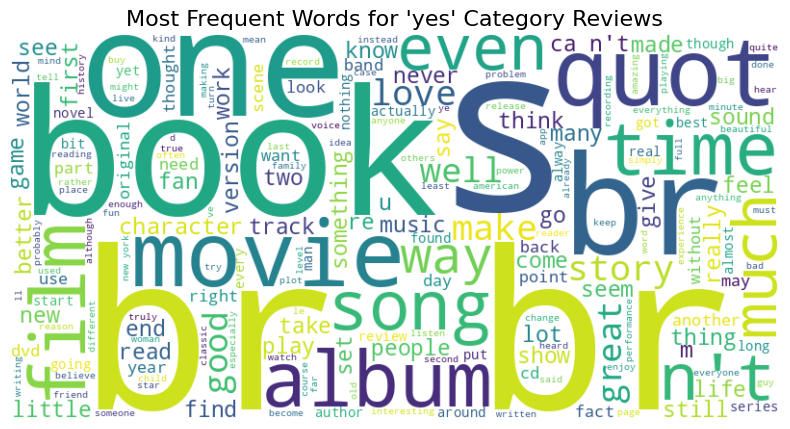

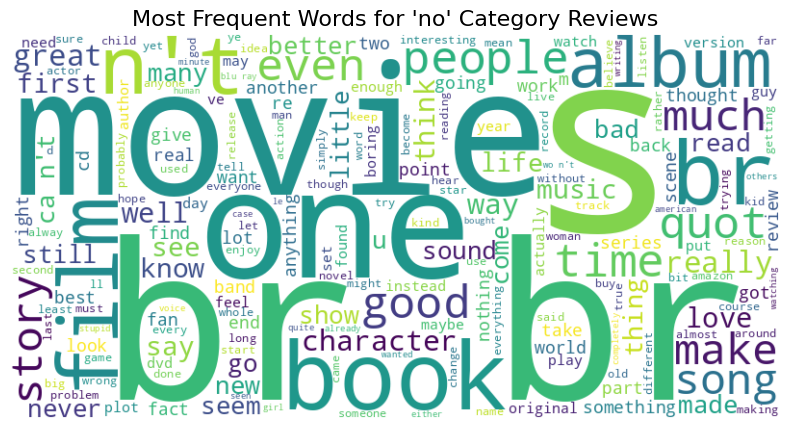

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate a word cloud for a specific helpful category
def generate_wordcloud(text, helpful_category):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Most Frequent Words for '{helpful_category}' Category Reviews", fontsize=16)
    plt.show()

# Loop through each unique helpful category (yes/no)
for helpful_category in df_help['helpful'].unique():
    # Filter the reviews for the current helpful category
    reviews = df_help[df_help['helpful'] == helpful_category]

    # Concatenate all lemmatized words into a single string for the word cloud
    review_text = ' '.join([' '.join(lemma) for lemma in reviews['review_body']])  # Assuming review_body is lemmatized

    # Generate and display the word cloud
    generate_wordcloud(review_text, helpful_category)



In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use the lemmatized reviews (or any other preprocessed text like lowercased reviews)
# Concatenate the lemmatized words back into full sentences for each review
df_help['review_tf_idf'] = df_help['review_body'].apply(lambda x: ' '.join(x))

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust 'max_features' based on your needs

# Fit the vectorizer on the processed review text and transform to get the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df_help['review_tf_idf'])

# Convert the result to a DataFrame for easier inspection (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
tfidf_df.head()


<ipython-input-19-065410563453>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_help['review_tf_idf'] = df_help['review_body'].apply(lambda x: ' '.join(x))


,00,000,01,04,06,07,10,100,10th,11,...,your,youth,youtube,yr,zen,zeppelin,zero,zombie,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the target variable (for example, 'star_rating')
y = df_help['helpful']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)


## Feeding TF-IDF vectors to ML Models

### Logistic Regression with TF-IDF

In [ ]:
from sklearn.linear_model import LogisticRegression
# Step 5: Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)  # Use more iterations if needed
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 72.36%

Classification Report:
               precision    recall  f1-score   support

          no       0.72      0.65      0.68      1036
         yes       0.73      0.79      0.76      1236

    accuracy                           0.72      2272
   macro avg       0.72      0.72      0.72      2272
weighted avg       0.72      0.72      0.72      2272



### Naive Bayes with TF-IDF

In [ ]:

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, nb_preds)}")
# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.7090669014084507

Classification Report:
               precision    recall  f1-score   support

          no       0.72      0.65      0.68      1036
         yes       0.73      0.79      0.76      1236

    accuracy                           0.72      2272
   macro avg       0.72      0.72      0.72      2272
weighted avg       0.72      0.72      0.72      2272



### Random Forest with TF-IDF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Step 5: Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 70.25%

Classification Report:
               precision    recall  f1-score   support

          no       0.72      0.57      0.64      1036
         yes       0.69      0.81      0.75      1236

    accuracy                           0.70      2272
   macro avg       0.71      0.69      0.69      2272
weighted avg       0.71      0.70      0.70      2272



### SVM with TF-IDF

In [ ]:
from sklearn.svm import SVC

# Step 5: Initialize and train the SVM model
model = SVC(kernel='linear', random_state=42)  # Using a linear kernel for simplicity
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 71.26%

Classification Report:
               precision    recall  f1-score   support

          no       0.70      0.65      0.67      1036
         yes       0.72      0.77      0.74      1236

    accuracy                           0.71      2272
   macro avg       0.71      0.71      0.71      2272
weighted avg       0.71      0.71      0.71      2272



### XGBoost with TF-IDF

In [22]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Encode 'yes' and 'no' labels as 1 and 0
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize and train the XGBoost model
model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = model.predict(X_test)

# Measure the accuracy of the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")

# Print the classification report for more detailed metrics
print("\nXGBoost Classification Report:\n", classification_report(y_test_encoded, y_pred_encoded))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:08:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 71.43%

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68      1036
           1       0.73      0.75      0.74      1236

    accuracy                           0.71      2272
   macro avg       0.71      0.71      0.71      2272
weighted avg       0.71      0.71      0.71      2272



## Feeding TF-IDF vectors to DL Models

### RNN with TF-IDF

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import LabelEncoder

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

X=tfidf_matrix

# Convert TF-IDF matrix (X) and product_category (y) to tensors
X_tensor = torch.tensor(X.toarray(), dtype=torch.float32)  # Convert TF-IDF matrix to tensor (sparse to dense)

# Encode product_category labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_help['helpful'])  # Encode string labels into integers
y_tensor = torch.tensor(y_encoded, dtype=torch.long)  # Convert labels to long tensor

# Add sequence length dimension to X (since TF-IDF is treated as a static feature vector)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, num_features)

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)

        # Forward propagate the RNN
        out, _ = self.rnn(x, h0)

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out

In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Number of features in the TF-IDF matrix
hidden_size = 128               # Number of RNN units
output_size = len(torch.unique(y_tensor))  # Number of unique star ratings (classes)
num_layers = 1                  # Number of RNN layers

# Initialize the model
model = RNNModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.5883
Epoch [2/10], Loss: 0.4484
Epoch [3/10], Loss: 0.3860
Epoch [4/10], Loss: 0.3461
Epoch [5/10], Loss: 0.3155
Epoch [6/10], Loss: 0.2940
Epoch [7/10], Loss: 0.2713
Epoch [8/10], Loss: 0.2530
Epoch [9/10], Loss: 0.2418
Epoch [10/10], Loss: 0.2270


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)

Accuracy: 65.89%
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1064
           1       0.68      0.68      0.68      1208

    accuracy                           0.66      2272
   macro avg       0.66      0.66      0.66      2272
weighted avg       0.66      0.66      0.66      2272



### LSTM with TF-IDF

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import LabelEncoder

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Convert TF-IDF matrix (X) and product_category (y) to tensors
X_tensor = torch.tensor(X.toarray(), dtype=torch.float32)  # Convert TF-IDF matrix to tensor (sparse to dense)

# Encode product_category labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_help['helpful'])  # Encode string labels into integers
y_tensor = torch.tensor(y_encoded, dtype=torch.long)  # Convert labels to long tensor

# Add sequence length dimension to X (since TF-IDF is treated as a static feature vector)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, num_features)

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Hidden state
        c0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Cell state

        # Forward propagate the LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out

In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Number of features in the TF-IDF matrix
hidden_size = 128               # Number of LSTM units
output_size = len(label_encoder.classes_)  # Number of unique product categories (classes)
num_layers = 1                  # Number of LSTM layers

# Initialize the model
model = LSTMModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.6072
Epoch [2/10], Loss: 0.4513
Epoch [3/10], Loss: 0.3788
Epoch [4/10], Loss: 0.3310
Epoch [5/10], Loss: 0.2912
Epoch [6/10], Loss: 0.2646
Epoch [7/10], Loss: 0.2359
Epoch [8/10], Loss: 0.2137
Epoch [9/10], Loss: 0.1906
Epoch [10/10], Loss: 0.1694


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)

Accuracy: 66.20%
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65      1059
           1       0.70      0.65      0.67      1213

    accuracy                           0.66      2272
   macro avg       0.66      0.66      0.66      2272
weighted avg       0.66      0.66      0.66      2272



### GRU with TF-IDF

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import LabelEncoder

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Convert TF-IDF matrix (X) and product_category (y) to tensors
X_tensor = torch.tensor(X.toarray(), dtype=torch.float32)  # Convert TF-IDF matrix to tensor (sparse to dense)

# Encode product_category labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_help['helpful'])  # Encode string labels into integers
y_tensor = torch.tensor(y_encoded, dtype=torch.long)  # Convert labels to long tensor

# Add sequence length dimension to X (since TF-IDF is treated as a static feature vector)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, num_features)

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Hidden state

        # Forward propagate the GRU
        out, _ = self.gru(x, h0)

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out


In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Number of features in the TF-IDF matrix
hidden_size = 128               # Number of GRU units
output_size = len(label_encoder.classes_)  # Number of unique product categories (classes)
num_layers = 1                  # Number of GRU layers

# Initialize the model
model = GRUModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.5994
Epoch [2/10], Loss: 0.4477
Epoch [3/10], Loss: 0.3812
Epoch [4/10], Loss: 0.3366
Epoch [5/10], Loss: 0.3042
Epoch [6/10], Loss: 0.2775
Epoch [7/10], Loss: 0.2521
Epoch [8/10], Loss: 0.2309
Epoch [9/10], Loss: 0.2110
Epoch [10/10], Loss: 0.1923


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)

Accuracy: 66.29%
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.61      0.63      1052
           1       0.68      0.71      0.69      1220

    accuracy                           0.66      2272
   macro avg       0.66      0.66      0.66      2272
weighted avg       0.66      0.66      0.66      2272



## Convert Reviews to BERT Embeddings

In [ ]:
!pip install transformers torch

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

In [ ]:
# Step 3: Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Ensure the model runs on GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
def get_bert_embeddings_batch(reviews, batch_size=32):
    embeddings_list = []

    total_batches = (len(reviews) + batch_size - 1) // batch_size  # Calculate total number of batches

    for i in range(0, len(reviews), batch_size):
        batch = reviews[i:i + batch_size]

        # Tokenize the batch
        tokens = tokenizer(
            batch,
            padding=True,
            truncation=True,
            max_length=512,
            return_tensors="pt"
        )
        tokens = {key: val.to(device) for key, val in tokens.items()}

        # Get model outputs
        with torch.no_grad():
            outputs = model(**tokens)

        # Extract the [CLS] token embeddings
        batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings_list.extend(batch_embeddings)

        # Print every 100th batch
        batch_number = (i // batch_size) + 1
        if batch_number % 50 == 0:
            print(f"Completed batch {batch_number}/{total_batches}")

    return embeddings_list




In [ ]:
# Step 5: Extract BERT embeddings from the cleaned review bodies
reviews = df_help['review_body'].tolist()  # Extract the cleaned review text as a list
bert_embeddings = get_bert_embeddings_batch(reviews)

# Step 6: Convert embeddings into a list of vectors
embeddings_as_vectors = [embedding.tolist() for embedding in bert_embeddings]



Completed batch 50/355
Completed batch 100/355
Completed batch 150/355
Completed batch 200/355
Completed batch 250/355
Completed batch 300/355
Completed batch 350/355


In [ ]:
# Step 7: Create a DataFrame with two columns: embeddings and star ratings
output_df_help = pd.DataFrame({
    'bert_embeddings': embeddings_as_vectors,
    'star_rating': df_help['helpful']
})

# Step 8: Display the DataFrame with two columns
output_df_help.head()

,bert_embeddings,star_rating
58,"[0.006716188043355942, -0.33001908659935, 0.00...",yes
91,"[-0.4813379943370819, -0.13457489013671875, -0...",yes
98,"[-0.3968745470046997, -0.6200948357582092, -0....",yes
99,"[-0.029488440603017807, -0.16223406791687012, ...",yes
114,"[-0.14744563400745392, -0.2774699032306671, 0....",yes


In [ ]:
# Save the DataFrame using Pickle
output_df_help.to_pickle('/content/drive/MyDrive/ML Project/bert_embeddings_helpfulness.pkl')

In [23]:
# To load the Pickle file later:
df3 = pd.read_pickle('/content/drive/MyDrive/ML Project/bert_embeddings_helpfulness.pkl')
X_help=df3['bert_embeddings']
y_help=df3['star_rating']
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
X_2d=np.array(X_help.tolist())
X_train, X_test, y_train, y_test = train_test_split(X_2d, y_help, test_size=0.2, random_state=42)


## Feed the BERT Embeddings to ML Models

### Naive Bayes with BERT

In [ ]:
# Step 5: Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 65.80%

Classification Report:
               precision    recall  f1-score   support

          no       0.62      0.66      0.64      1036
         yes       0.70      0.66      0.68      1236

    accuracy                           0.66      2272
   macro avg       0.66      0.66      0.66      2272
weighted avg       0.66      0.66      0.66      2272



### Logistic Regression with BERT

In [ ]:
from sklearn.linear_model import LogisticRegression
# Step 5: Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)  # Use more iterations if needed
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 72.58%

Classification Report:
               precision    recall  f1-score   support

          no       0.70      0.69      0.70      1036
         yes       0.75      0.75      0.75      1236

    accuracy                           0.73      2272
   macro avg       0.72      0.72      0.72      2272
weighted avg       0.73      0.73      0.73      2272



### SVM with BERT

In [ ]:
from sklearn.svm import SVC
# Step 5: Initialize and train the SVM model
model = SVC(kernel='linear', random_state=42)  # Using linear kernel for simplicity
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 72.05%

Classification Report:
               precision    recall  f1-score   support

          no       0.69      0.69      0.69      1036
         yes       0.74      0.75      0.74      1236

    accuracy                           0.72      2272
   macro avg       0.72      0.72      0.72      2272
weighted avg       0.72      0.72      0.72      2272



### Random Forest with BERT

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Step 5: Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Print the classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 70.99%

Classification Report:
               precision    recall  f1-score   support

          no       0.70      0.63      0.66      1036
         yes       0.71      0.78      0.74      1236

    accuracy                           0.71      2272
   macro avg       0.71      0.70      0.70      2272
weighted avg       0.71      0.71      0.71      2272



### XGBoost with BERT

In [24]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Encode 'yes' and 'no' labels as 1 and 0
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize and train the XGBoost model
model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = model.predict(X_test)

# Measure the accuracy of the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")

# Print the classification report for more detailed metrics
print("\nXGBoost Classification Report:\n", classification_report(y_test_encoded, y_pred_encoded))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:10:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 72.10%

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.67      0.69      1036
           1       0.73      0.77      0.75      1236

    accuracy                           0.72      2272
   macro avg       0.72      0.72      0.72      2272
weighted avg       0.72      0.72      0.72      2272



## Feed BERT Embeddings to DL Models

### RNN with BERT

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
# Encode product_category labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_help)  # Encode string labels into integers
y_tensor = torch.tensor(y_encoded, dtype=torch.long)  # Convert labels to long tensor

# Convert BERT embeddings to a PyTorch tensor
X_tensor = torch.tensor(X_2d, dtype=torch.float32)  # Ensure embeddings are float32 tensors

# Add sequence length dimension to X (since BERT embeddings are treated as static vectors)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, embedding_size)

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)

        # Forward propagate the RNN
        out, _ = self.rnn(x, h0)

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out

In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Size of BERT embeddings (e.g., 768 dimensions)
hidden_size = 128               # Number of RNN units
output_size = len(label_encoder.classes_)  # Number of unique product categories (classes)
num_layers = 1                  # Number of RNN layers

# Initialize the model
model = RNNModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.5591
Epoch [2/10], Loss: 0.5309
Epoch [3/10], Loss: 0.5135
Epoch [4/10], Loss: 0.4987
Epoch [5/10], Loss: 0.4886
Epoch [6/10], Loss: 0.4810
Epoch [7/10], Loss: 0.4681
Epoch [8/10], Loss: 0.4601
Epoch [9/10], Loss: 0.4469
Epoch [10/10], Loss: 0.4308


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)



Accuracy: 75.13%
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1014
           1       0.77      0.78      0.78      1258

    accuracy                           0.75      2272
   macro avg       0.75      0.75      0.75      2272
weighted avg       0.75      0.75      0.75      2272



### LSTM with BERT

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
# Encode product_category labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_help)  # Encode string labels into integers
y_tensor = torch.tensor(y_encoded, dtype=torch.long)  # Convert labels to long tensor

# Convert BERT embeddings to a PyTorch tensor
X_tensor = torch.tensor(X_2d, dtype=torch.float32)  # Ensure embeddings are float32 tensors

# Add sequence length dimension to X (since BERT embeddings are treated as static vectors)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, embedding_size)

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Hidden state
        c0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Cell state

        # Forward propagate the LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out

In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Number of features in the TF-IDF matrix
hidden_size = 128               # Number of LSTM units
output_size = len(label_encoder.classes_)  # Number of unique product categories (classes)
num_layers = 1                  # Number of LSTM layers

# Initialize the model
model = LSTMModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.5552
Epoch [2/10], Loss: 0.5128
Epoch [3/10], Loss: 0.4973
Epoch [4/10], Loss: 0.4785
Epoch [5/10], Loss: 0.4645
Epoch [6/10], Loss: 0.4465
Epoch [7/10], Loss: 0.4247
Epoch [8/10], Loss: 0.4047
Epoch [9/10], Loss: 0.3847
Epoch [10/10], Loss: 0.3548


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)

Accuracy: 73.37%
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68      1020
           1       0.74      0.81      0.77      1252

    accuracy                           0.73      2272
   macro avg       0.73      0.73      0.73      2272
weighted avg       0.73      0.73      0.73      2272



### GRU with BERT

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Enable CUDA synchronous execution for debugging
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
# Encode product_category labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_help)  # Encode string labels into integers
y_tensor = torch.tensor(y_encoded, dtype=torch.long)  # Convert labels to long tensor

# Convert BERT embeddings to a PyTorch tensor
X_tensor = torch.tensor(X_2d, dtype=torch.float32)  # Ensure embeddings are float32 tensors

# Add sequence length dimension to X (since BERT embeddings are treated as static vectors)
X_tensor = X_tensor.unsqueeze(1)  # Shape: (num_samples, 1, embedding_size)

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into training and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)  # Hidden state

        # Forward propagate the GRU
        out, _ = self.gru(x, h0)

        # Take the output from the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)
        return out


In [ ]:
# Model parameters
input_size = X_tensor.shape[2]  # Number of features in the TF-IDF matrix
hidden_size = 128               # Number of GRU units
output_size = len(label_encoder.classes_)  # Number of unique product categories (classes)
num_layers = 1                  # Number of GRU layers

# Initialize the model
model = GRUModel(input_size, hidden_size, output_size, num_layers)

# Check if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
model = model.to(device)

# Move data to the appropriate device during training
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.5547
Epoch [2/10], Loss: 0.5207
Epoch [3/10], Loss: 0.5063
Epoch [4/10], Loss: 0.4881
Epoch [5/10], Loss: 0.4775
Epoch [6/10], Loss: 0.4600
Epoch [7/10], Loss: 0.4399
Epoch [8/10], Loss: 0.4227
Epoch [9/10], Loss: 0.3981
Epoch [10/10], Loss: 0.3827


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))

# Evaluate the model on the test set
evaluate(model, test_loader)

Accuracy: 74.08%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1040
           1       0.76      0.76      0.76      1232

    accuracy                           0.74      2272
   macro avg       0.74      0.74      0.74      2272
weighted avg       0.74      0.74      0.74      2272

